In [5]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# raking age and salary as feature
df.drop(columns = ['User ID' , 'Gender'] , axis = 1 , inplace = True)

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


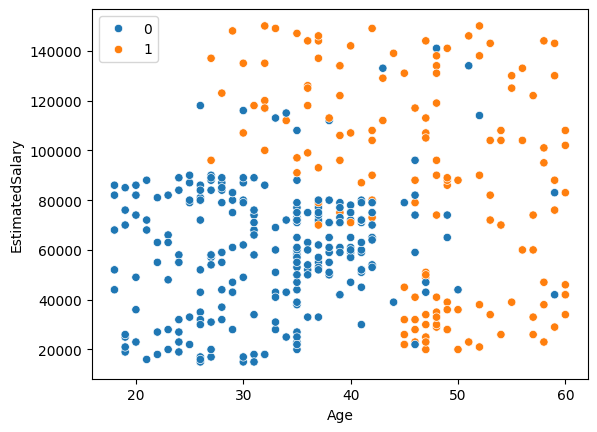

In [6]:
sns.scatterplot(x = df['Age'] , y = df['EstimatedSalary'] , hue = df['Purchased'])
plt.legend()
plt.show()

In [8]:
X = df.iloc[ : , 0:2]
y = df.iloc[ : , -1]

X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Input

In [14]:
model = Sequential()

# add the input layer 
model.add(Input(shape = (2 , )))
# add one hidden layer 
model.add(Dense(128 , activation = 'relu'))
# add the output layer 
model.add(Dense(1 , activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [17]:
history = model.fit(X_train , y_train , validation_data = (X_test , y_test) , epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4344 - loss: 1509.6576 - val_accuracy: 0.6500 - val_loss: 768.0573
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6406 - loss: 865.9207 - val_accuracy: 0.6500 - val_loss: 177.1560
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4156 - loss: 257.3784 - val_accuracy: 0.6500 - val_loss: 227.3535
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5594 - loss: 213.3597 - val_accuracy: 0.3500 - val_loss: 181.9005
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4594 - loss: 82.9589 - val_accuracy: 0.6500 - val_loss: 56.1765
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5469 - loss: 39.6535 - val_accuracy: 0.6500 - val_loss: 4.4210
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5344 - loss: 30.1529 - val_accuracy: 0.3500 - val_loss: 122.7267
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4719 - loss: 98

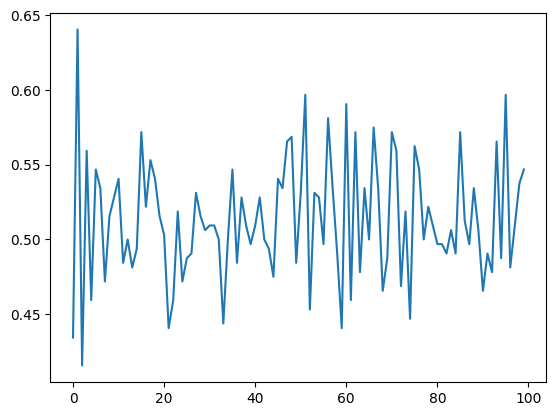

In [21]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.show()

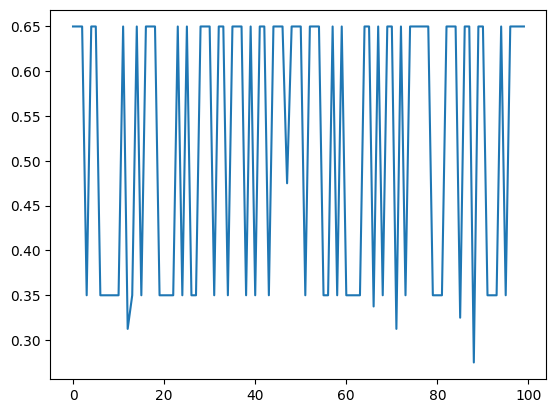

In [22]:
# plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

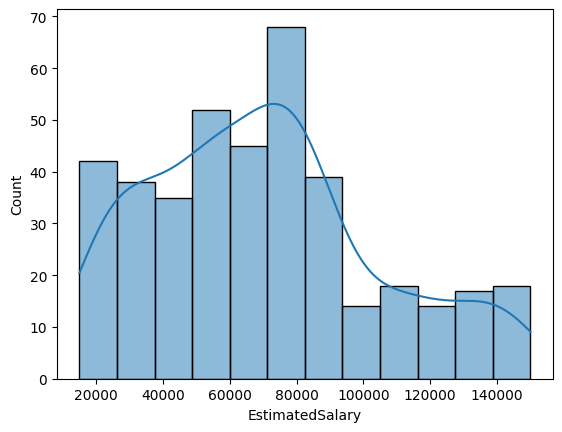

In [24]:
# distribution of salary 
sns.histplot(X['EstimatedSalary'] , kde = True) 
plt.show()

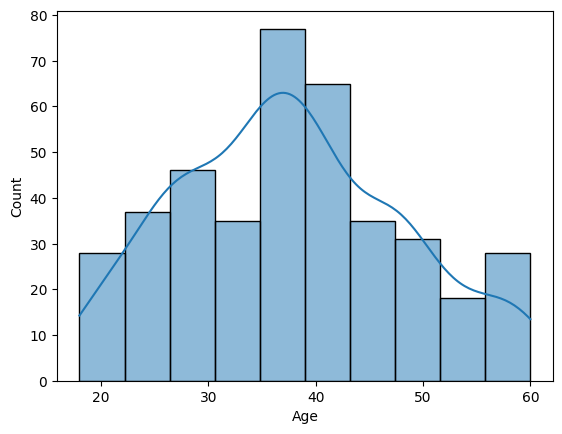

In [25]:
# distribution of Age 
sns.histplot(X['Age'] , kde = True) 
plt.show()

## Using Standardization

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
model = Sequential([
    Input(shape = (2 , )),
    Dense(128 , activation = 'relu'), 
    Dense(1 , activation = 'sigmoid')
])

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [31]:
history = model.fit(X_train_scaled , y_train , validation_data = (X_test_scaled , y_test) , epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7375 - loss: 0.6470 - val_accuracy: 0.8875 - val_loss: 0.5939
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8406 - loss: 0.5989 - val_accuracy: 0.8875 - val_loss: 0.5409
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8469 - loss: 0.5575 - val_accuracy: 0.8875 - val_loss: 0.4938
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8406 - loss: 0.5205 - val_accuracy: 0.8875 - val_loss: 0.4530
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8313 - loss: 0.4884 - val_accuracy: 0.8875 - val_loss: 0.4154
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8344 - loss: 0.4599 - val_accuracy: 0.8875 - val_loss: 0.3839
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8375 - loss: 0.4341 - val_accuracy: 0.9125 - val_loss: 0.3558
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8656 - loss: 0.4119 - val_accuracy: 0.

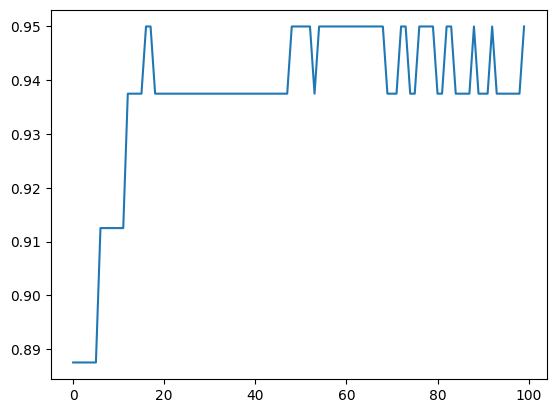

In [32]:
# plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

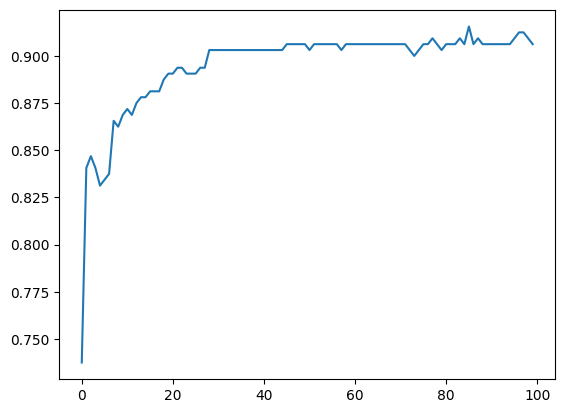

In [33]:
plt.plot(history.history['accuracy'])
plt.show()